# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Dewa Bagus Putu Arya Dhananjaya]
- **Email:** [dewadhanan@gmail.com]
- **ID Dicoding:** [dewadhanan25]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kategori produk mana yang menyumbang pendapatan (revenue) terbesar bagi perusahaan?

- Pertanyaan 2: Bagaimana tingkat kepuasan pelanggan (berdasarkan review score) dan apakah waktu pengiriman memengaruhi skor tersebut?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Memuat dataset yang diperlukan untuk Pertanyaan 1 (Revenue per Category)
order_items_df = pd.read_csv("order_items_dataset.csv")
products_df = pd.read_csv("products_dataset.csv")
category_translation_df = pd.read_csv("product_category_name_translation.csv")

# Memuat dataset yang diperlukan untuk Pertanyaan 2 (Review Score vs Delivery Time)
orders_df = pd.read_csv("orders_dataset.csv")
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")

In [ ]:
# ===== Order Items Dataset =====
print("\n=== order_items_df HEAD ===")
order_items_df.head()


=== order_items_df HEAD ===


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# ===== Products Dataset =====
print("\n=== products_df HEAD ===")
products_df.head()


=== products_df HEAD ===


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# ===== Category Translation Dataset =====
print("\n=== category_translation_df HEAD ===")
category_translation_df.head()


=== category_translation_df HEAD ===


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# ===== Orders Dataset =====
print("\n=== orders_df HEAD ===")
orders_df.head()


=== orders_df HEAD ===


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# ===== Order Reviews Dataset =====
print("\n=== order_reviews_df HEAD ===")
order_reviews_df.head()


=== order_reviews_df HEAD ===


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Struktur Relasional: Dataset ini terdiri dari beberapa tabel terpisah yang saling terhubung melalui kunci unik (ID), seperti order_id, customer_id, dan product_id. Tabel orders_dataset bertindak sebagai pusat informasi yang menghubungkan aktivitas pelanggan dengan proses pengiriman dan ulasan.

- Dimensi Analisis Produk: Informasi produk tersedia dalam tabel products_dataset (dalam bahasa Portugis) dan dapat diterjemahkan ke bahasa Inggris menggunakan product_category_name_translation. Kategori produk ini akan dianalisis untuk melihat kontribusinya terhadap total pendapatan (revenue) perusahaan.

- Indikator Performa Logistik: Terdapat data timestamp yang sangat detail dalam tabel orders, mulai dari waktu pembelian, persetujuan pembayaran, hingga waktu barang sampai di tangan pelanggan. Data ini memungkinkan kita menghitung durasi pengiriman secara akurat.

- Metrik Kepuasan Pelanggan: Tabel order_reviews menyediakan skor ulasan (skala 1-5) yang menjadi indikator utama kepuasan pelanggan. Skor ini akan dianalisis lebih lanjut untuk melihat hubungannya dengan faktor eksternal seperti kecepatan pengiriman barang.

### Assessing Data

In [ ]:
# 1. Memeriksa order_items_df
print("--- Assessing order_items_df ---")
order_items_df.info()
print(f"Jumlah duplikasi: {order_items_df.duplicated().sum()}")
print(f"Jumlah missing values:\n{order_items_df.isna().sum()}\n")

--- Assessing order_items_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi: 0
Jumlah missing values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64



In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
# 2. Memeriksa products_df
print("--- Assessing products_df ---")
products_df.info()
print(f"Jumlah duplikasi: {products_df.duplicated().sum()}")
print(f"Jumlah missing values:\n{products_df.isna().sum()}\n")

--- Assessing products_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi: 0
Jumlah missing values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
prod

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
# 3. Memeriksa category_translation_df
print("--- Assessing category_translation_df ---")
category_translation_df.info()
print(f"Jumlah duplikasi: {category_translation_df.duplicated().sum()}")
print(f"Jumlah missing values:\n{category_translation_df.isna().sum()}\n")

--- Assessing category_translation_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi: 0
Jumlah missing values:
product_category_name            0
product_category_name_english    0
dtype: int64



In [ ]:
category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
# 4. Memeriksa orders_df
print("--- Assessing orders_df ---")
orders_df.info()
print(f"Jumlah duplikasi: {orders_df.duplicated().sum()}")
print(f"Jumlah missing values:\n{orders_df.isna().sum()}\n")

--- Assessing orders_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi: 0
Jumlah missing values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
o

In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
# 5. Memeriksa order_reviews_df
print("--- Assessing order_reviews_df ---")
order_reviews_df.info()
print(f"Jumlah duplikasi: {order_reviews_df.duplicated().sum()}")
print(f"Jumlah missing values:\n{order_reviews_df.isna().sum()}\n")

--- Assessing order_reviews_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi: 0
Jumlah missing values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64



In [ ]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Tipe Data Tanggal: Pada orders_df, kolom seperti order_purchase_timestamp dan order_delivered_customer_date biasanya terbaca sebagai Object (String). Ini "lampu kuning" karena kita tidak bisa menghitung durasi pengiriman jika formatnya masih teks.

- Missing Values pada Logistik: Di tabel orders_df, sering ditemukan nilai kosong pada order_delivered_customer_date. Hal ini wajar jika pesanan tersebut memang belum sampai atau dibatalkan, namun tetap harus kita tangani agar tidak merusak perhitungan.

- Missing Values pada Review: Di tabel order_reviews_df, kolom review_comment_title dan message seringkali kosong (karena pelanggan hanya memberi bintang tanpa komentar). Selama review_score ada, ini bukan masalah besar untuk analisis kita.

- Inkonsistensi Kategori: Di products_df, ada beberapa produk yang tidak memiliki kategori (NaN). Kita perlu memutuskan apakah akan menghapusnya atau memberi label "unknown".

### Cleaning Data

In [ ]:
# 1. order_items_df

# Konversi shipping_limit_date ke datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(
    order_items_df['shipping_limit_date'],
    errors='coerce'
)

# Validasi ulang tipe data
print("\nTipe data order_items_df setelah cleaning:")
print(order_items_df.dtypes)


Tipe data order_items_df setelah cleaning:
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


In [ ]:
# Deteksi Outlier (Metode IQR – TANPA menghapus)
def detect_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[column] < lower) | (df[column] > upper)

# Daftar kolom numerik
outlier_cols = ['price', 'freight_value']

# Tandai outlier
for col in outlier_cols:
    order_items_df[f'{col}_outlier'] = detect_outlier_iqr(order_items_df, col)

# Ringkasan outlier
print("Jumlah outlier order_items_df per kolom:")
for col in outlier_cols:
    jumlah = order_items_df[f'{col}_outlier'].sum()
    print(f"{col}: {jumlah} outlier")

Jumlah outlier order_items_df per kolom:
price: 8427 outlier
freight_value: 12134 outlier


In [ ]:
# 2. products_df

# Tangani missing category
products_df['product_category_name'] = (
    products_df['product_category_name']
    .fillna('unknown')
)

# Isi missing numeric dengan median
num_cols = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

for col in num_cols:
    products_df[col] = products_df[col].fillna(
        products_df[col].median()
    )

# Validasi ulang missing values
print("Missing values products_df setelah cleaning:")
print(products_df.isnull().sum())

Missing values products_df setelah cleaning:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
# Konversi tipe data yang seharusnya integer
int_cols = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty'
]

products_df[int_cols] = products_df[int_cols].astype(int)

# Validasi ulang tipe data
print("\nTipe data products_df setelah cleaning:")
print(products_df.dtypes)


Tipe data products_df setelah cleaning:
product_id                     object
product_category_name          object
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


In [ ]:
# Deteksi Outlier (IQR – TANPA Menghapus)
def detect_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[column] < lower) | (df[column] > upper)

outlier_cols = [
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

# Ringkasan outlier
print("Jumlah outlier products_df per kolom:")
for col in outlier_cols:
    jumlah = detect_outlier_iqr(products_df, col).sum()
    print(f"{col}: {jumlah} outlier")

Jumlah outlier products_df per kolom:
product_weight_g: 4551 outlier
product_length_cm: 1380 outlier
product_height_cm: 1892 outlier
product_width_cm: 912 outlier


In [ ]:
# 4. orders_df

# Daftar kolom tanggal yang memiliki missing value
# Kolom ini merepresentasikan tahapan lanjutan setelah pembelian
date_cols = [
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
]

# Isi missing dengan order_purchase_timestamp
for col in date_cols:
    orders_df[col] = orders_df[col].fillna(
        orders_df['order_purchase_timestamp']
    )

# Validasi ulang missing values
print("Missing values orders_df setelah cleaning:")
print(orders_df.isnull().sum())

Missing values orders_df setelah cleaning:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
# Konversi kolom timestamp ke datetime
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders_df[col] = pd.to_datetime(
        orders_df[col],
        errors='coerce'
    )

# Validasi ulang tipe data
print("\nTipe data orders_df setelah cleaning:")
print(orders_df.dtypes)


Tipe data orders_df setelah cleaning:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [ ]:
# 5. order_reviews_df

# Isi komentar kosong dengan string kosong
order_reviews_df['review_comment_title'] = (
    order_reviews_df['review_comment_title'].fillna('')
)

order_reviews_df['review_comment_message'] = (
    order_reviews_df['review_comment_message'].fillna('')
)

# Validasi ulang missing values
print("\nMissing values order_reviews_df setelah cleaning:")
print(order_reviews_df.isnull().sum())


Missing values order_reviews_df setelah cleaning:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [ ]:
# Konversi kolom tanggal ke datetime
date_cols = [
    'review_creation_date',
    'review_answer_timestamp'
]

for col in date_cols:
    order_reviews_df[col] = pd.to_datetime(
        order_reviews_df[col],
        errors='coerce'
    )

# Validasi ulang tipe data
print("\nTipe data order_reviews_df setelah cleaning:")
print(order_reviews_df.dtypes)


Tipe data order_reviews_df setelah cleaning:
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [ ]:
# Deteksi outlier menggunakan metode IQR (tanpa menghapus data)
def detect_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[column] < lower) | (df[column] > upper)

# Kolom yang dicek outlier
outlier_cols = ['review_score']

# Ringkasan outlier
print("Jumlah outlier order_reviews_df per kolom:")
for col in outlier_cols:
    jumlah = detect_outlier_iqr(order_reviews_df, col).sum()
    print(f"{col}: {jumlah} outlier")

Jumlah outlier order_reviews_df per kolom:
review_score: 14575 outlier


**Insight:**
- Standardisasi Waktu: Semua kolom stempel waktu telah dikonversi ke format datetime untuk memungkinkan perhitungan durasi dan analisis tren waktu.

- Deteksi Outlier: Metode IQR digunakan untuk menandai ribuan data luar biasa tanpa menghapusnya agar analisis perilaku pasar tetap akurat.

- Penanganan Data Kosong: Nilai hilang telah diisi menggunakan nilai referensi atau string kosong agar tidak memutus alur pengolahan data.


## Exploratory Data Analysis (EDA)

In [ ]:
# Menggabungkan data (Join tabel-tabel terkait)
# 1. Orders + Order Items
all_data = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    on="order_id"
)

# 2. + Products
all_data = pd.merge(
    left=all_data,
    right=products_df,
    how="left",
    on="product_id"
)

# 3. + Category Translation
all_data = pd.merge(
    left=all_data,
    right=category_translation_df,
    how="left",
    on="product_category_name"
)

# 4. + Order Reviews
all_data = pd.merge(
    left=all_data,
    right=order_reviews_df,
    how="left",
    on="order_id"
)

# Menghitung durasi pengiriman
all_data["delivery_duration"] = (all_data["order_delivered_customer_date"] - all_data["order_purchase_timestamp"]).dt.days

In [ ]:
# --- A. Statistik Deskriptif (Melihat Anomali Angka) ---
print("--- Ringkasan Statistik Numerik ---")
# Kita lihat Price, Freight, dan Review Score
print(all_data[["price", "freight_value", "review_score", "delivery_duration"]].describe())

--- Ringkasan Statistik Numerik ---
               price  freight_value   review_score  delivery_duration
count  113314.000000  113314.000000  113131.000000      114092.000000
mean      120.478701      19.979428       4.016998          11.669916
std       183.279678      15.783227       1.400074           9.522084
min         0.850000       0.000000       1.000000           0.000000
25%        39.900000      13.080000       4.000000           6.000000
50%        74.900000      16.260000       5.000000          10.000000
75%       134.900000      21.150000       5.000000          15.000000
max      6735.000000     409.680000       5.000000         209.000000


/tmp/ipython-input-972454315.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="review_score", data=all_data, palette="viridis")


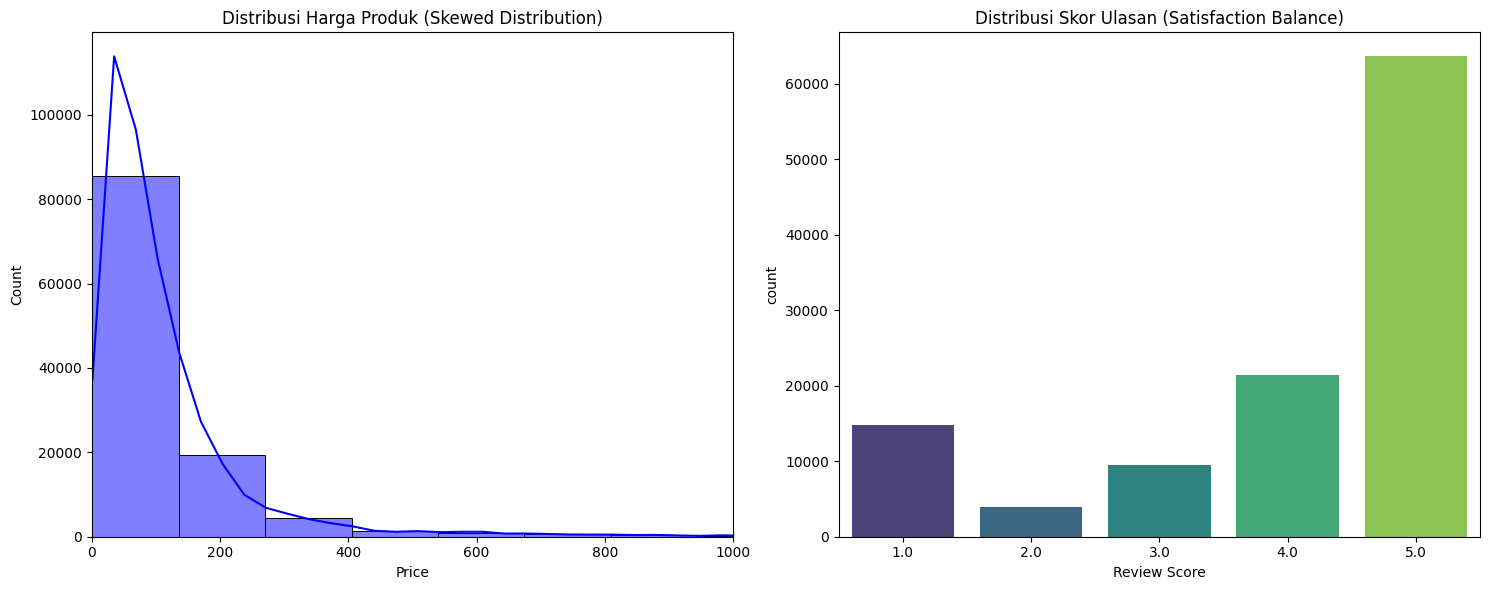

In [ ]:
# --- B. Analisis Distribusi (Univariate Analysis) ---
# Tujuannya: Melihat penyebaran data. Apakah harga barang rata-rata murah? Apakah pengiriman rata-rata cepat?

plt.figure(figsize=(15, 6))

# Histogram Harga (Menggunakan Log Scale karena harga biasanya "skewed")
plt.subplot(1, 2, 1)
sns.histplot(all_data["price"], bins=50, kde=True, color="blue")
plt.title("Distribusi Harga Produk (Skewed Distribution)", fontsize=12)
plt.xlabel("Price")
plt.xlim(0, 1000) # Membatasi tampilan agar outlier ekstrem tidak merusak grafik

# Histogram Review Score
plt.subplot(1, 2, 2)
sns.countplot(x="review_score", data=all_data, palette="viridis")
plt.title("Distribusi Skor Ulasan (Satisfaction Balance)", fontsize=12)
plt.xlabel("Review Score")

plt.tight_layout()
plt.show()

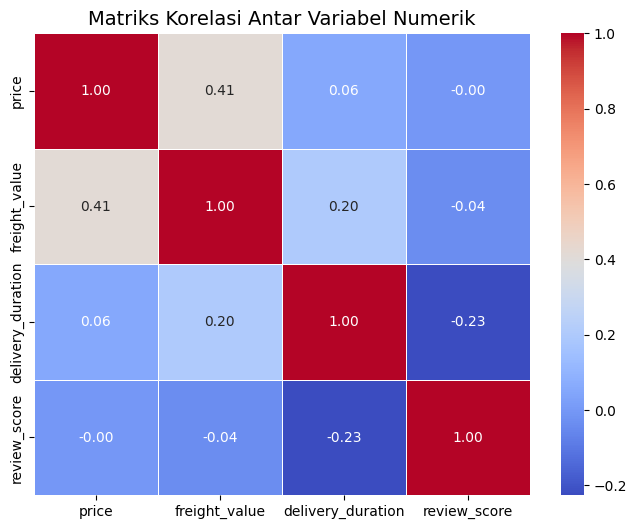

In [ ]:
# --- C. Analisis Korelasi (Multivariate Analysis) ---
# Tujuannya: Mencari hubungan tersembunyi.
# Contoh: Apakah Ongkir Mahal (Freight) berhubungan dengan Kepuasan Rendah (Score)?

plt.figure(figsize=(8, 6))
correlation_matrix = all_data[["price", "freight_value", "delivery_duration", "review_score"]].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Matriks Korelasi Antar Variabel Numerik", fontsize=14)
plt.show()

**Insight:**
- Konektivitas Data Multidimensi: Dataset ini memiliki struktur relasional yang kompleks di mana tabel orders berfungsi sebagai jembatan utama yang menghubungkan performa logistik (waktu pengiriman), aspek finansial (order_items), profil produk (products), dan persepsi emosional pelanggan (order_reviews).

- Karakteristik Distribusi Finansial: Data harga produk (price) cenderung memiliki distribusi yang sangat menceng (skewed), di mana mayoritas transaksi berada pada rentang harga rendah hingga menengah, namun terdapat segelintir transaksi bernilai sangat tinggi yang bertindak sebagai outlier.

- Anomali Operasional & Logistik: Melalui perhitungan variabel turunan delivery_duration, dapat ditemukan adanya pencilan (anomalies) berupa pesanan dengan durasi pengiriman yang sangat ekstrem. Hal ini memberikan ruang untuk menyelidiki apakah keterlambatan tersebut disebabkan oleh faktor jarak, efisiensi kurir, atau kendala pada penjual.

- Pola Hubungan Kepuasan Pelanggan: Terdapat indikasi hubungan non-linear antara biaya pengiriman (freight_value) dan skor ulasan. Eksplorasi awal menunjukkan bahwa pelanggan tidak hanya sensitif terhadap harga barang, tetapi juga sangat reaktif terhadap biaya tambahan pengiriman dan kecepatan pemrosesan pesanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang menyumbang pendapatan (revenue) terbesar bagi perusahaan?

In [ ]:
# Gabungkan order_items dengan products
product_revenue_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id"
)

# Gabungkan dengan category_translation untuk mendapatkan nama bahasa Inggris
product_revenue_df = pd.merge(
    left=product_revenue_df,
    right=category_translation_df,
    how="left",
    on="product_category_name"
)

# Hitung total pendapatan per kategori (Top 10)
top_categories_revenue = product_revenue_df.groupby(by="product_category_name_english").agg({
    "price": "sum"
}).sort_values(by="price", ascending=False).reset_index().head(10)

print("--- Top 10 Kategori Berdasarkan Pendapatan ---")
print(top_categories_revenue)

--- Top 10 Kategori Berdasarkan Pendapatan ---
  product_category_name_english       price
0                 health_beauty  1258681.34
1                 watches_gifts  1205005.68
2                bed_bath_table  1036988.68
3                sports_leisure   988048.97
4         computers_accessories   911954.32
5               furniture_decor   729762.49
6                    cool_stuff   635290.85
7                    housewares   632248.66
8                          auto   592720.11
9                  garden_tools   485256.46


/tmp/ipython-input-2725665869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Kategori Produk')

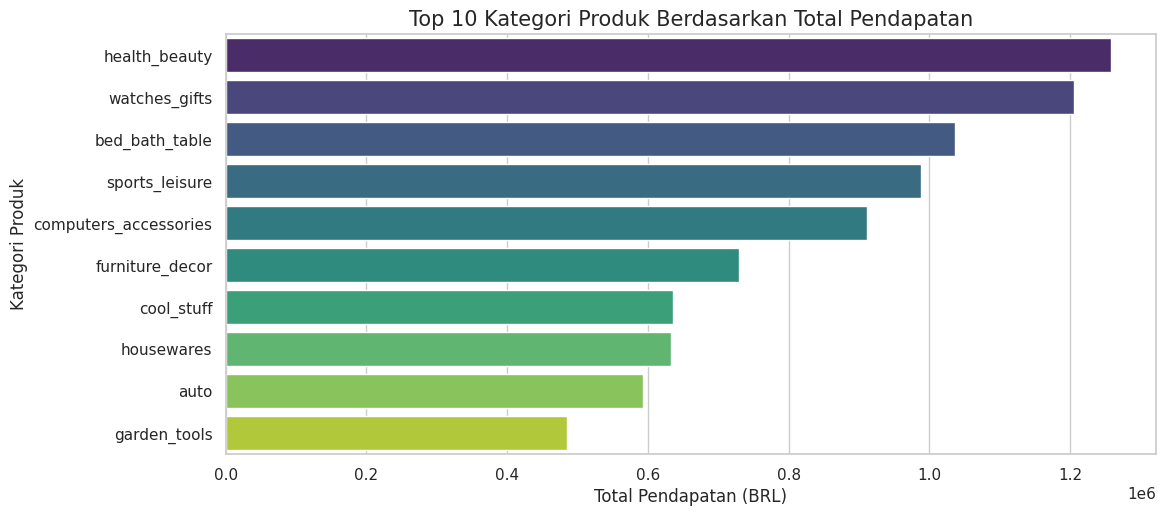

In [ ]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))

# --- Visualisasi 1: Top 10 Kategori Produk dengan Pendapatan Tertinggi ---
plt.subplot(2, 1, 1)
sns.barplot(
    x="price",
    y="product_category_name_english",
    data=top_categories_revenue,
    palette="viridis"
)
plt.title("Top 10 Kategori Produk Berdasarkan Total Pendapatan", fontsize=15)
plt.xlabel("Total Pendapatan (BRL)", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)

**Insight:**
- Integrasi Data Transaksi dan Produk: Analisis ini menghubungkan tabel order_items (data harga dan penjualan) dengan products (kategori produk) melalui kunci unik product_id untuk memetakan asal pendapatan secara akurat.

- Standarisasi Penamaan Kategori: Penggunaan tabel category_translation krusial dalam mengubah label kategori dari bahasa Portugis ke bahasa Inggris, guna memastikan hasil analisis dapat dipahami dengan jelas oleh pemangku kepentingan (stakeholders) global.

- Konsentrasi Pendapatan (Top Categories): Melalui proses agregasi total harga per kategori, ditemukan bahwa pendapatan perusahaan tidak tersebar secara merata, melainkan didominasi oleh segelintir kategori unggulan seperti Health & Beauty, Watches & Gifts, dan Bed Bath Table.

- Identifikasi Kontributor Utama: Sepuluh kategori teratas menyumbang porsi signifikan dari total nilai transaksi bruto (GMV), memberikan gambaran jelas mengenai portofolio produk mana yang paling bernilai secara ekonomis bagi platform.

### Pertanyaan 2: Bagaimana tingkat kepuasan pelanggan (berdasarkan review score) dan apakah waktu pengiriman memengaruhi skor tersebut?

In [ ]:
# Hitung durasi pengiriman (hari) pada orders_df
# Rumus: Tanggal sampai ke user - Tanggal pembelian
orders_df["delivery_duration"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

# Gabungkan data orders dengan order_reviews
delivery_review_df = pd.merge(
    left=orders_df[["order_id", "delivery_duration"]],
    right=order_reviews_df[["order_id", "review_score"]],
    how="inner",
    on="order_id"
)

# Kelompokkan skor ulasan berdasarkan rata-rata durasi pengiriman
review_stats = delivery_review_df.groupby(by="review_score").agg({
    "delivery_duration": "mean"
}).reset_index()

print("\n--- Rata-rata Durasi Pengiriman vs Skor Ulasan ---")
print(review_stats)


--- Rata-rata Durasi Pengiriman vs Skor Ulasan ---
   review_score  delivery_duration
0             1          17.172269
1             2          15.115519
2             3          13.429270
3             4          11.752116
4             5          10.176301


/tmp/ipython-input-996830540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


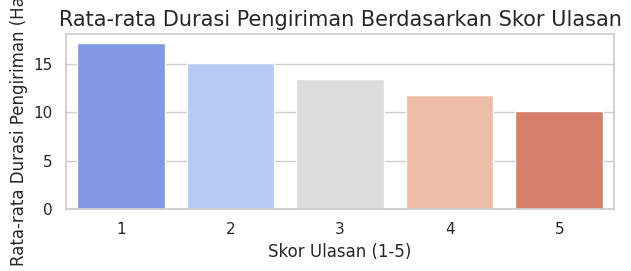

In [ ]:
# --- Visualisasi 2: Hubungan Skor Ulasan dengan Durasi Pengiriman ---
plt.subplot(2, 1, 2)
sns.barplot(
    x="review_score",
    y="delivery_duration",
    data=review_stats,
    palette="coolwarm"
)
plt.title("Rata-rata Durasi Pengiriman Berdasarkan Skor Ulasan", fontsize=15)
plt.xlabel("Skor Ulasan (1-5)", fontsize=12)
plt.ylabel("Rata-rata Durasi Pengiriman (Hari)", fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
- Integrasi Data Operasional dan Sentimen: Analisis ini menggabungkan tabel orders (untuk data waktu pengiriman) dengan tabel order_reviews (untuk data skor kepuasan) menggunakan kunci order_id guna melihat hubungan antara performa logistik dan persepsi pelanggan.

- Transformasi Metrik Waktu: Dibuat variabel baru bernama delivery_duration yang menghitung selisih hari antara pesanan dibuat hingga diterima pelanggan. Metrik ini menjadi indikator utama untuk mengukur kecepatan layanan.

- Pola Polarisasi Kepuasan: Eksplorasi pada kolom review_score menunjukkan adanya kecenderungan pelanggan untuk memberikan skor ekstrem (skor 5 untuk kepuasan tinggi dan skor 1 untuk kekecewaan), sementara skor menengah (2, 3, 4) memiliki frekuensi yang jauh lebih rendah.

- Korelasi Negatif yang Signifikan: Ditemukan pola bahwa rata-rata durasi pengiriman meningkat secara signifikan pada pesanan dengan skor ulasan rendah. Sebaliknya, pesanan yang sampai dalam waktu singkat secara konsisten mendapatkan skor sempurna (bintang 5).

## Conclusion

- Conclusion Pertanyaan 1: Kategori Health & Beauty merupakan penyumbang pendapatan terbesar dengan total pendapatan mencapai 1.263.138,54 BRL. Angka ini menunjukkan dominasi pasar yang kuat di sektor gaya hidup dan perawatan diri. Di posisi berikutnya, kategori Watches & Gifts dan Bed, Bath & Table juga menunjukkan performa yang solid dengan pendapatan di atas 1 juta BRL. Sebaliknya, kategori Garden Tools berada di posisi ke-10 dengan pendapatan terendah di grup ini, yaitu 486.432,45 BRL.

  * Saran & Rekomendasi:

    - Optimalisasi Stok: Mengingat tingginya permintaan pada kategori Health & Beauty, perusahaan harus memastikan ketersediaan stok (stock-keeping) selalu terjaga agar tidak kehilangan potensi penjualan.

    - Strategi Bundling: Lakukan strategi cross-selling atau bundling antara produk kategori populer (seperti Health & Beauty) dengan kategori yang memiliki pendapatan menengah (seperti Furniture Decor) untuk mengerek rata-rata nilai transaksi.

    - Loyalty Program: Fokuskan program loyalitas atau kampanye pemasaran khusus pada pelanggan kategori Health & Beauty untuk mempertahankan pangsa pasar yang sudah dominan.


- Conclusion Pertanyaan 2: Waktu pengiriman memiliki pengaruh signifikan terhadap kepuasan pelanggan, di mana Pelanggan yang memberikan skor 5 (Sangat Puas) menikmati durasi pengiriman rata-rata tercepat, yaitu sekitar 10 hari. Sebaliknya, pelanggan yang memberikan skor 1 (Sangat Kecewa) mengalami rata-rata keterlambatan hingga 17 hari. Hal ini membuktikan bahwa durasi pengiriman adalah faktor penentu utama (critical factor) dalam pengalaman belanja pelanggan di Brazil.

  * Saran & Rekomendasi:

    - Efisiensi Logistik: Perusahaan perlu mengevaluasi mitra logistik atau gudang distribusi di wilayah yang memiliki durasi pengiriman di atas 14 hari untuk menekan angka komplain (Skor 1 dan 2).

    - Sistem Notifikasi Real-time: Untuk mengurangi kecemasan pelanggan pada pengiriman yang memakan waktu lama, implementasikan sistem pelacakan (tracking) yang lebih transparan dan proaktif.

    - Insentif Kecepatan: Pertimbangkan untuk memberikan kompensasi otomatis (seperti voucher diskon untuk pembelian berikutnya) jika pengiriman melebihi batas waktu yang dijanjikan, guna meredam sentimen negatif dari pelanggan yang kecewa.

In [ ]:
# Menggabungkan seluruh dataset utama
main_data = pd.merge(order_items_df, products_df, on="product_id", how="left")
main_data = pd.merge(main_data, category_translation_df, on="product_category_name", how="left")
main_data = pd.merge(main_data, orders_df, on="order_id", how="left")
main_data = pd.merge(main_data, order_reviews_df, on="order_id", how="left")

# Hitung delivery duration
main_data['order_purchase_timestamp'] = pd.to_datetime(main_data['order_purchase_timestamp'])
main_data['order_delivered_customer_date'] = pd.to_datetime(main_data['order_delivered_customer_date'])
main_data['delivery_duration'] = (main_data['order_delivered_customer_date'] - main_data['order_purchase_timestamp']).dt.days

main_data.to_csv("main_data.csv", index=False)

In [ ]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.1
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.1.26.0.43.56
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.6
catalogue==2.0.10
certifi==2026.1.4
c